**Basura espacial**

La fuerza de atracción gravitacional entre dos masa puntuales  esta descrita por la siguiente ecuación:

\begin{equation}
\vec{F}=-\frac{GmM}{r^{2}}\hat{r}
\end{equation}

Si en lugar de una masa puntual tenemos un cuerpo extenso debemos efectuar la suma vectorial de todas las fuerzas individuales. En este caso el cuerpo consiste en una distribucion lineal continua de materia (una barra). Así la expresion se transforma en:

\begin{equation}
\vec{F}=-Gm\int_{v}^{}\frac{\rho dv}{r^{2}}\hat{r} 
\end{equation}

la densidad lineal de la barra es:

\begin{equation}
\rho =\frac{M}{l} 
\end{equation}

la barra  tiene una longitud L y se extiende en la direcion del eje z por tanto su diferencial dv sera un diferencial de longitud en z:

\begin{equation}
dv=dz 
\end{equation}

El vector $ \vec{r}  $ da información de la posición de la masa sobre la que se ejerce la fuerza respecto  un punto de la barra :

\begin{equation}
\vec{r}=x\hat{i}+y\hat{j}+z\hat{k}
\end{equation}

Entonces podemos escribir la fuerza como:

\begin{equation}
\vec{F}=-\frac{GmM}{l}\int_{-\frac{l}{2}}^{\frac{l}{2}}\frac{dz}{(x^{2}+y^{2}+z^{2})^\frac{3}{2}}\vec{r}
\end{equation}


Resolviendo la integral obtenemos:

\begin{equation}
\vec{F}=-\frac{GmM}{x^{2}+y^{2}\sqrt[]{x^{2}+y^{2}+\frac{l^{2}}{4}}}\vec{r}
\end{equation}


El problema nos indica que la masa se mantiene en el plano xy  por lo tanto la componente en $\hat{k}$ de $\vec{r}$ sera 0

\begin{equation}
\vec{r}=x\hat{i}+y\hat{j}
\end{equation}


\begin{equation}
r=\sqrt[]{x^{2}+y^{2}}
\end{equation}

por la tanto la fuerza es 

\begin{equation}
\vec{F}=-\frac{GmM}{x^{2}+y^{2}\sqrt[]{x^{2}+y^{2}+\frac{l^{2}}{4}}}(x\hat{i}+y\hat{j})
\end{equation}

Ahora usando la le segunda ley de Newton podemos encontrar la aceceracion en cada componente:

\begin{equation}
m\vec{a}=\sum \vec{F}
\end{equation}

\begin{equation}
a_{x}=\frac{F_{x}}{m}=-\frac{GM}{r^{2}\sqrt[]{r^{2}+\frac{l^{2}}{4}}}x
\end{equation}

\begin{equation}
a_{y}=\frac{F_{y}}{m}=-\frac{GM}{r^{2}\sqrt[]{r^{2}+\frac{l^{2}}{4}}}y
\end{equation}

Podemos usar la notación de Newton para transformar estas 2 ecuaciones de segundo orden en 4 de primer orden:

\begin{equation}
\dot{x}=v_{x}
\end{equation}

\begin{equation}
\ddot{x}=-\frac{GM}{r^{2}\sqrt[]{r^{2}+\frac{l^{2}}{4}}}x
\end{equation}

\begin{equation}
\dot{y}=v_{y}
\end{equation}

\begin{equation}
\ddot{y}=-\frac{GM}{r^{2}\sqrt[]{r^{2}+\frac{l^{2}}{4}}}y
\end{equation}

In [1]:
from math import sin,pi,cos,sqrt
from numpy import array,arange
from pylab import plot, xlabel,ylabel, show,legend, title
from vpython import cylinder, vector, sphere, rate, canvas

<IPython.core.display.Javascript object>

In [2]:
#parametros constantes
L = 2.0 # longitud de la barra
G = 1.0 # constante de gravitacion asignada por el ejercicio
M = 10.0 # masa de la basura

def f(R,t):    #funcion que resive el arreglo R con los valores inciales y la variable temporal t
    x = R[0]
    
    vx = R[1]
    
    y = R[2]
    
    vy = R[3]
    
    r= sqrt(x**2 + y**2)
    
    fvx = -G*M*x/((r**2)*((r**2) + (L**2)/4))
                
    fvy = -G*M*y/((r**2)*((r**2) + (L**2)/4))
                
    return array([vx, fvx, vy, fvy], float)  #retorna los valores de las velocidades y las aceleraciones

In [3]:
ti = 0.0 #tiempo inicial
tf = 10.0 # tiempo final

N=1000 # numero pasos

h=(tf-ti)/N #tamaño del paso

x0 = 1.0  #posicion inicial en x del objeto que orbíta
y0 = 0.0  #posicion inicial en y del objeto que orbíta
vx0 = 0.0 #velocidad inicial en x del objeto que orbíta
vy0 = 1.0 #velocidad inicial en y del objeto que orbíta

tpoints = arange(ti, tf, h) # lista con el con los puntos de tiempo

xpoints = [] # arrelgos vacios que se llenaran con los datos de las posiciones en x e y  hallados mediante el metodo RK4
ypoints = []

R = array([x0, vx0, y0, vy0], float) # arreglo con los valores iniciales qu

for t in tpoints:   # metodo de RK4 implementado mediante un ciclo for
    xpoints.append(R[0])
    ypoints.append(R[2])
    
    k1 = h * f(R, t)
    k2 = h * f(R + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(R + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(R + k3, t + h)
    R += (k1 + 2 * k2 + 2 * k3 + k4) / 6

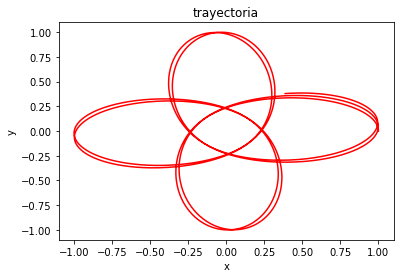

In [4]:
#graficamos los puntos en x e y para observar la trayectoria orbital del objeto de masa m
plot (xpoints, ypoints, 'r')
xlabel('x')
ylabel('y')
title('trayectoria')
show()

In [5]:
scene = canvas()

<IPython.core.display.Javascript object>

In [6]:
rod = cylinder(pos=vector(-L/2, 0, 0), axis=vector(L, 0, 0), radius=0.01)
bob = sphere(pos=vector(0, 1, 0), radius=0.05)

rod.red = 0.1

for t in range(len(tpoints)):
    rate(N/10)
    bob.pos = vector(0, xpoints[t], ypoints[t]) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Como se puede observar en la gráfica y en la animación, el objeto atraído por la barra no tiene una trayectoria orbital de tipo circular ni elíptico como el de los planetas, sino que posee un orbita que precesa.  Este resultado era esperado ya que sabemos por el teorema de Bertrand  que las únicas fuerzas centrales que producen órbitas cerradas estables  son

\begin{equation}
\vec{F}=-\frac{k}{r^2}
\end{equation}

\begin{equation}
\vec{F}=-kr
\end{equation}

En nuesto caso la fuerza no era de niguno de estos tipos y su orbita por tanto no sera cerrada ni estable y probablemente el objeto terminara colapsando contra la barra